In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import pandas as pd
%matplotlib inline


<img src="./capture.PNG" />
<img src="./capture1.PNG" />

| Variable Name |Description | Type variabele?
| --- | --- | --- |
|sepal_length|Lengte van de kelkbladeren | |
|sepal_width |Breedte van de kelkbladeren| |
|petal_length |Lengte van de bloemblaadjes | |
|petal_width | Breedte van de bloemblaadjes
|species|De soort iris (target)| |

In [3]:
df = pd.read_csv('iris.csv')
df.head()

#allemaal continue behalve species die is nominaal

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,144.000000,141.000000,138.000000
mean,5.826712,3.054861,3.755319,1.212319
std,0.816746,0.434175,1.730129,0.768395
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print(df.isnull().sum())

df.shape

sepal_length     4
sepal_width      6
petal_length     9
petal_width     12
species          6
dtype: int64


(150, 5)

In [10]:
df['species'].value_counts()


setosa        50
versicolor    47
virginica     47
Name: species, dtype: int64

In [12]:
df2 = df.dropna(subset=['species'])



In [13]:
df2.isnull().sum()

sepal_length     4
sepal_width      5
petal_length     9
petal_width     12
species          0
dtype: int64

In [15]:
avg = df2.mean()
df2 = df2.fillna(df2.mean())


/var/folders/82/b57kstbn303cy1b030wlchqm0000gn/T/ipykernel_1718/4175321027.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = df2.mean()
/var/folders/82/b57kstbn303cy1b030wlchqm0000gn/T/ipykernel_1718/4175321027.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df2.fillna(df2.mean())


In [16]:
df2.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 1.0, 'Verdeling over soortne')

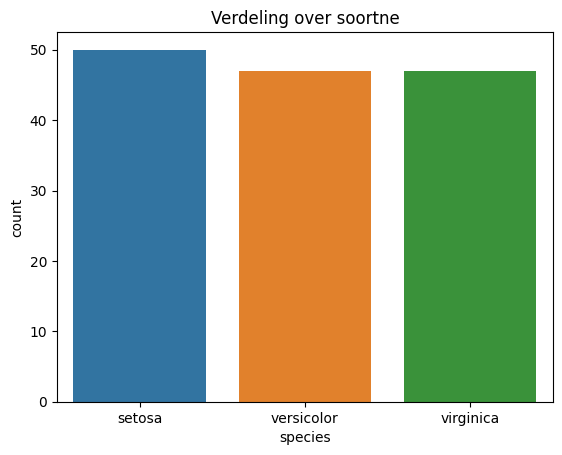

In [18]:
sns.countplot(x=df2['species'])
plt.title('Verdeling over soortne')

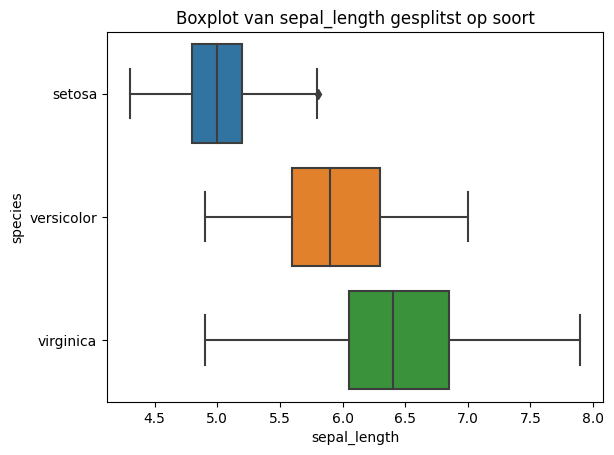

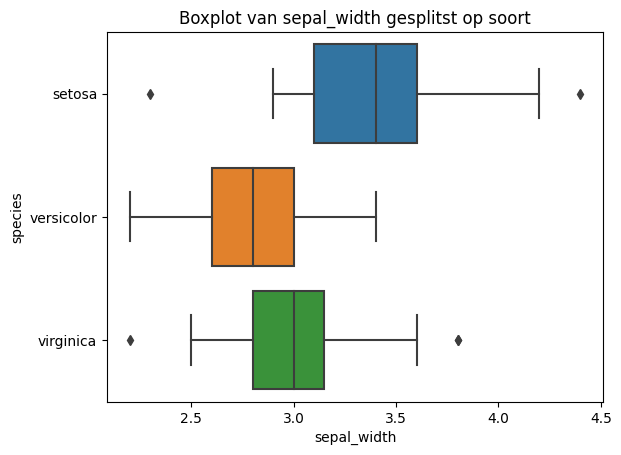

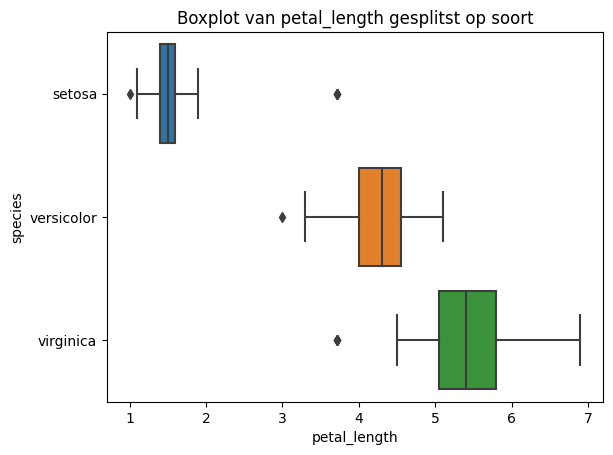

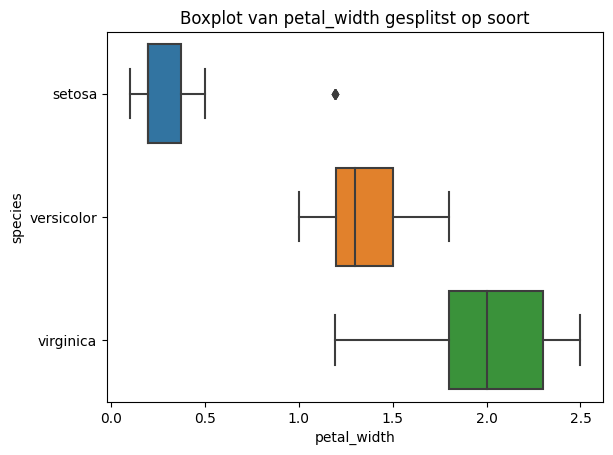

In [28]:
l = list(df2.columns)

#hier verijwdere we de alles brhalve de continue kolommen
l.remove('species')
l

for i in l:
    sns.boxplot(data=df2, y='species', x=i)
    plt.title(f'Boxplot van {i} gesplitst op soort')
    plt.show()




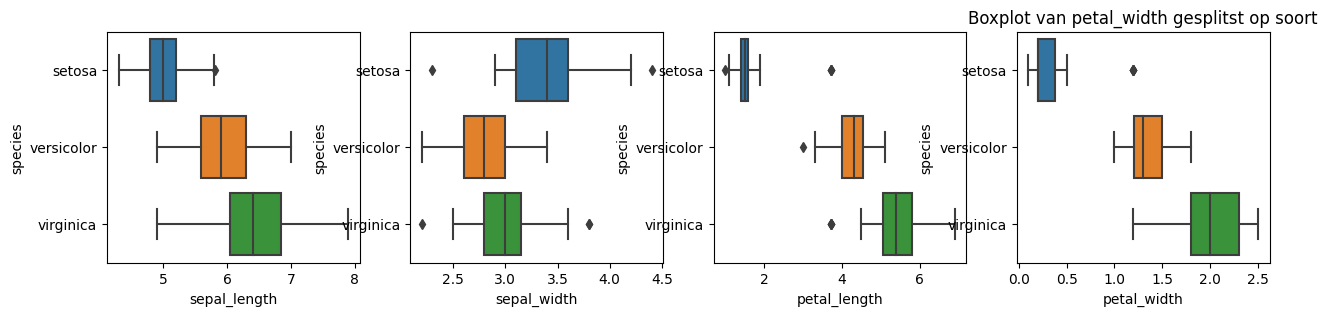

In [34]:
f, axes = plt.subplots(1,4, figsize=(15,3))


for i in range(len(l)):
    sns.boxplot(data=df2, y='species', x=l[i], ax=axes[i], whis=1.5)
    plt.title(f'Boxplot van {l[i]} gesplitst op soort')

plt.show()


<AxesSubplot:>

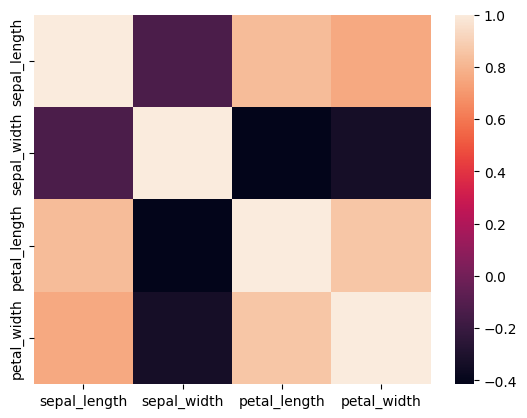

In [35]:
corr = df2.corr()
sns.heatmap(data=corr)

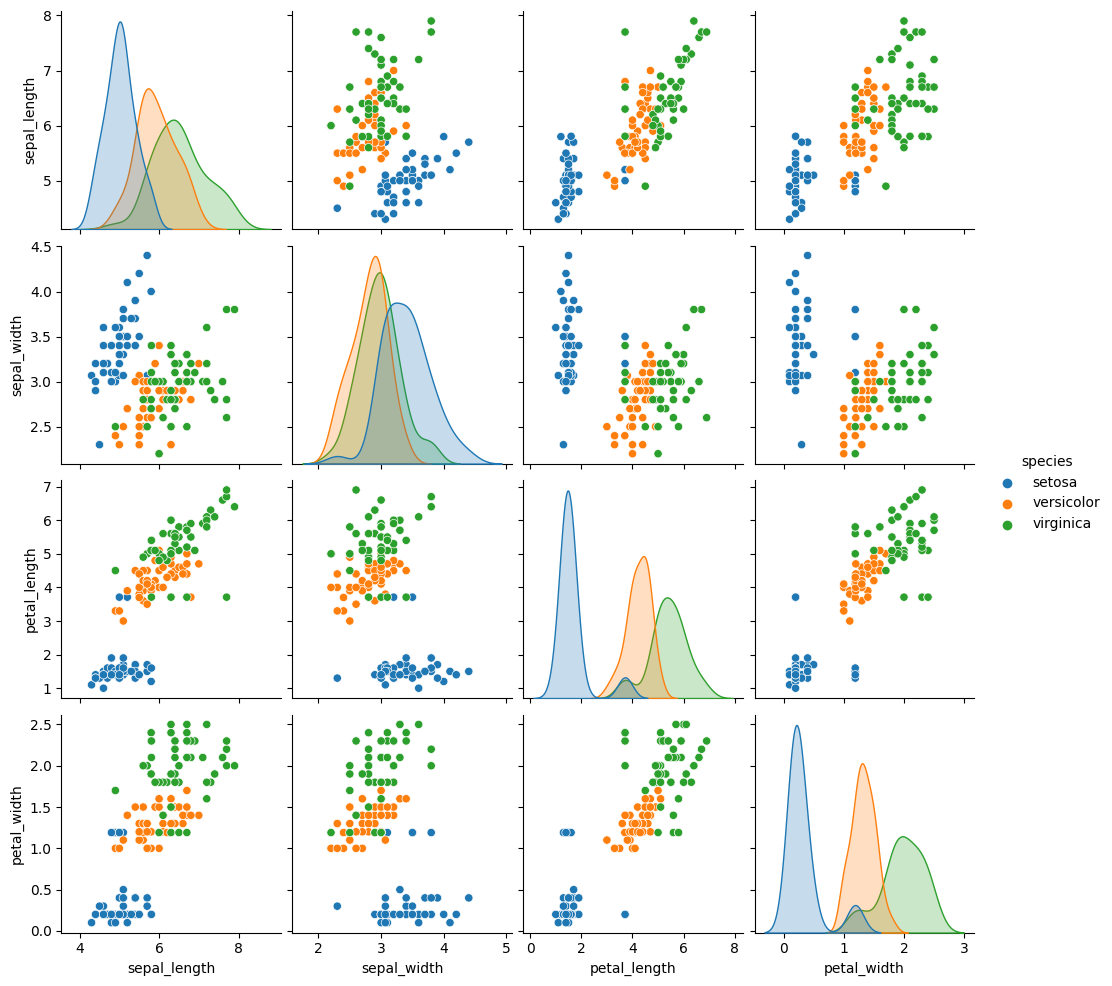

In [37]:
sns.pairplot(data=df2,hue='species',)

Vanaf hier het ML gedeelte


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model


In [39]:
y = df2['species']
X = df2.drop(['species','sepal_width','sepal_length'],axis=1)

In [40]:
y = y.replace({'setosa':0, 'versicolor':1, 'virginica':2})

In [41]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
# Trainen en testen van een random forest tree classifier
logreg = linear_model.LogisticRegression(C=100,class_weight='balanced')
logreg.fit(X_train, y_train)

# testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print('Accuracy: {}%'.format(accuracy_score(y_test,y_pred)*100))


Accuracy: 96.55172413793103%
